In this notebook, some basic statistical techniques are used to examine which features may be strongly related to the targe variable. Methods used include correlation analysis and an ANOVA.

In [1]:
# import packages that will be used for plotting and analyzing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('Data/train.csv')

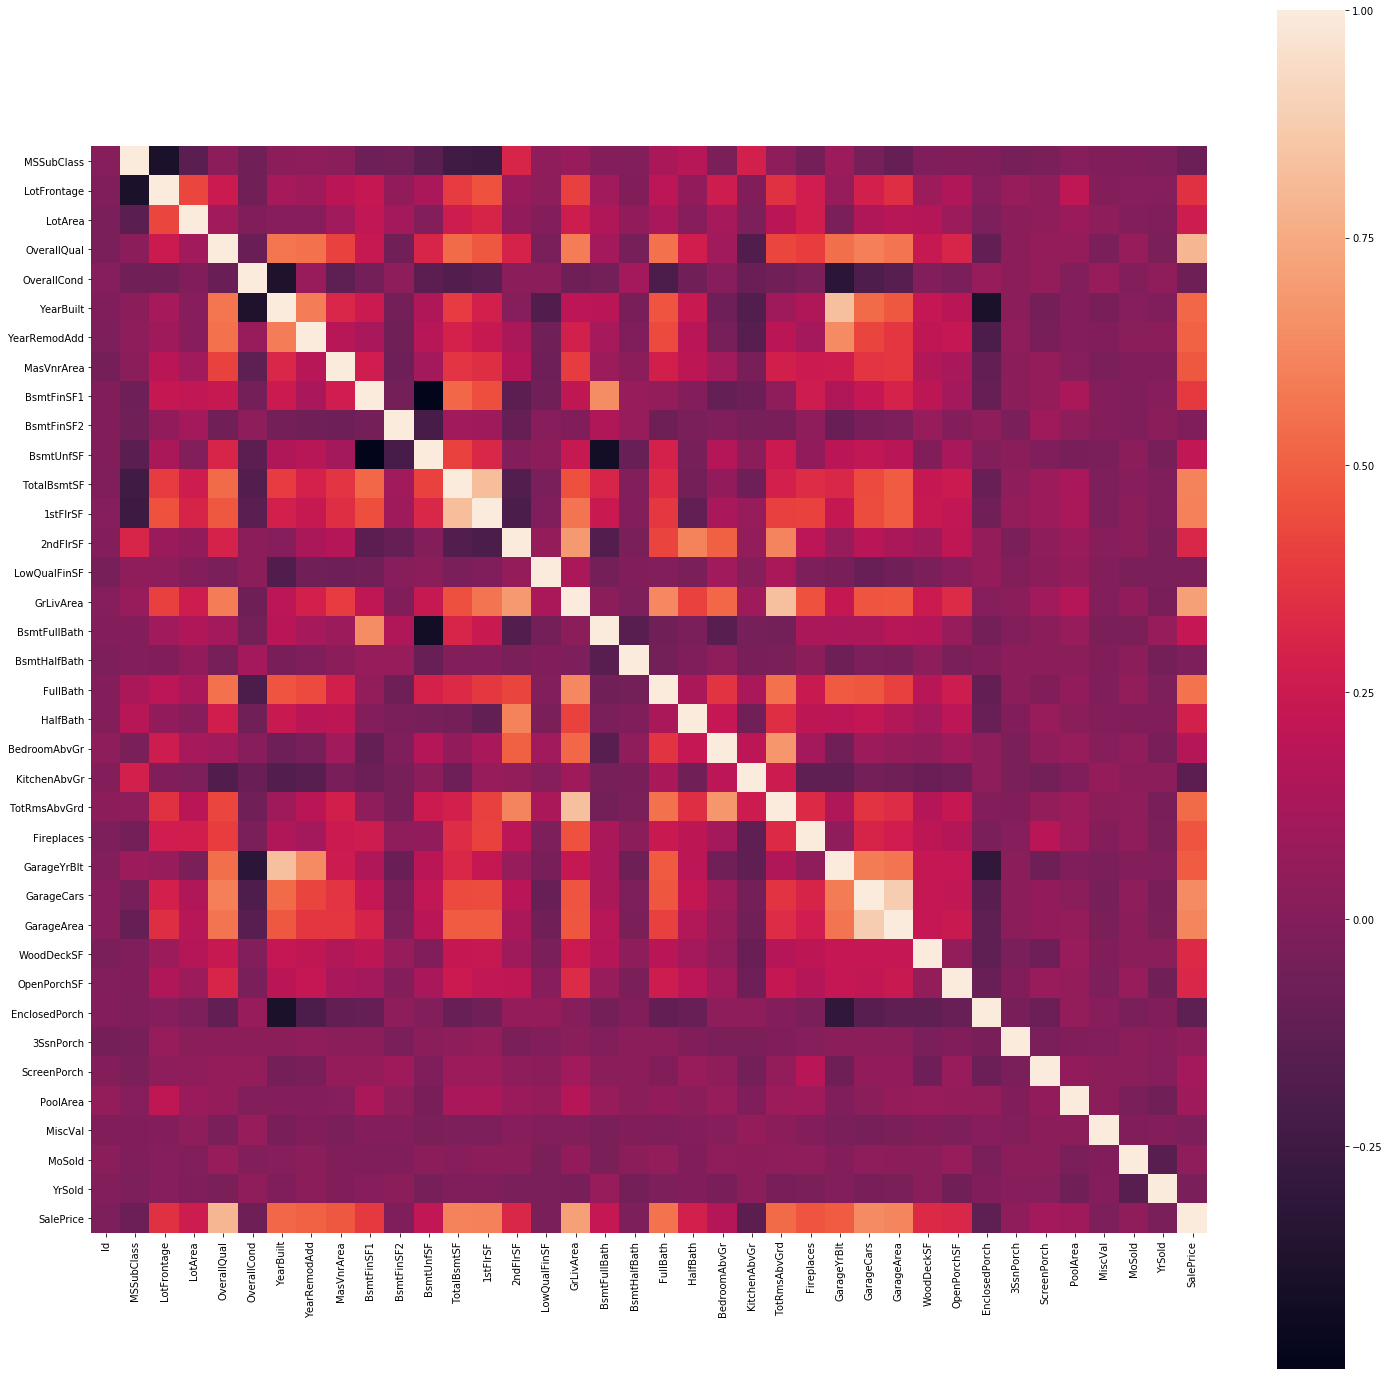

In [3]:
# create correlation matrix for numerical values 

f, ax = plt.subplots(figsize=(25, 25))
corrmat = df.corr()
sns.heatmap(corrmat[1:], vmax=1, square=True)

plt.show()

In [4]:
corr_SalePrice = {}

In [5]:
for i in corrmat.columns:
    corr_SalePrice[i] = scipy.stats.pearsonr(df['SalePrice'], df[i])
    #print(i, scipy.stats.pearsonr(df['SalePrice'], df[i]))

C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Most of the numerical features have a positive correlation with the sale price. 

In the DataFrame below, all of the pearson correlations and their p-values are listed.

In [6]:
corr_SalePrice = pd.DataFrame(corr_SalePrice).transpose()
corr_SalePrice.columns = ['Correlation', 'p-value']
corr_SalePrice.sort_values(by='Correlation', ascending=False)

,Correlation,p-value
SalePrice,1.000000,0.000000e+00
OverallQual,0.790982,2.185675e-313
GrLivArea,0.708624,4.518034e-223
GarageCars,0.640409,2.498644e-169
GarageArea,0.623431,5.265038e-158
TotalBsmtSF,0.613581,9.484229e-152
1stFlrSF,0.605852,5.394711e-147
FullBath,0.560664,1.236470e-121
TotRmsAbvGrd,0.533723,2.772281e-108
YearBuilt,0.522897,2.990229e-103


### ANOVA

For the categorical features, an ANOVA was done to examine whether or not there were significant variances between categories.

In [7]:
df_ANOVA = pd.DataFrame(columns=['fvalue', 'pvalue'])

In [8]:
for column in df:
    df2 = df.groupby(column)
    x = [df2['SalePrice'].get_group(x) for x in df2.groups]        
    df_ANOVA.loc[column] = [*stats.f_oneway(*x)]

C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\scipy\stats\stats.py:2967: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / float(dfwn)
C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\scipy\stats\stats.py:2968: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


In [9]:

df_ANOVA.sort_values(['fvalue'], ascending=False)[1:]

,fvalue,pvalue
ExterQual,443.334831,1.439551e-204
KitchenQual,407.806352,3.032213e-192
BsmtQual,392.913506,9.610615e-186
GarageCars,351.207486,1.121129e-211
OverallQual,349.026840,0.000000e+00
GarageFinish,250.962467,1.199117e-93
FullBath,246.067004,3.802188e-129
Fireplaces,146.741176,4.421001e-83
MasVnrType,111.672380,4.793331e-65
Foundation,100.253851,5.791895e-91
